In [ ]:
 import tensorflow as tf

In [ ]:
print(tf.__version__)

2.11.0


In [ ]:
#Load the Fashion MNIST dataset
fmnist=tf.keras.datasets.fashion_mnist

In [ ]:
(training_images,training_labels),(test_images,test_labels)=fmnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


LABEL: 9

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1 

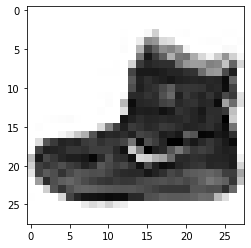

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
index=0
np.set_printoptions(linewidth=320)

print(f'LABEL: {training_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {training_images[index]}')
plt.imshow(training_images[index],cmap='Greys')

In [ ]:
#Normalization of pixel values of the training data
training_images=training_images/255.0
test_images=test_images/255.0

In [ ]:
#Build a classification model
model=tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(128,activation=tf.nn.relu),
                                  tf.keras.layers.Dense(10,activation=tf.nn.softmax)])

In [ ]:
model.compile(optimizer=tf.optimizers.Adam(),loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(training_images,training_labels,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 25s 12ms/step - loss: 0.4935 - accuracy: 0.8263
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3731 - accuracy: 0.8643
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3364 - accuracy: 0.8770
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3123 - accuracy: 0.8848
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2935 - accuracy: 0.8921


In [ ]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3442 - accuracy: 0.8738


[0.34420347213745117, 0.8737999796867371]

In [ ]:
classification_res=model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [ ]:
print(classification_res)

[[1.1854857e-07 2.1738215e-08 4.6684992e-08 ... 1.3823882e-02 5.1926065e-07 9.7968388e-01]
 [6.0163329e-06 1.1601535e-08 9.9617040e-01 ... 2.0726800e-11 1.2070334e-09 3.4213398e-12]
 [1.1560773e-07 9.9999958e-01 3.6768819e-10 ... 3.5606080e-15 4.1306676e-12 1.6380721e-12]
 ...
 [8.9979597e-04 8.1031254e-10 1.2284316e-04 ... 1.6642637e-07 9.9832326e-01 7.0550058e-08]
 [1.4484061e-07 9.9995905e-01 1.3826259e-07 ... 1.3243283e-12 9.9671977e-09 7.1186002e-10]
 [4.8748101e-04 1.0833118e-05 4.0690030e-04 ... 1.7578857e-02 2.7203967e-03 1.5171916e-04]]


In [ ]:
print(test_labels[0])
print(classification_res[0])

9
[1.1854857e-07 2.1738215e-08 4.6684992e-08 6.1521988e-09 9.5722665e-09 6.4911828e-03 3.7307251e-07 1.3823882e-02 5.1926065e-07 9.7968388e-01]


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if (logs.get('accuracy') >=0.6):
      print("\nReached 60% accuracy hence stoping the training!")
      self.model.stop_training=True
callbacks=myCallback()
fmnist=tf.keras.datasets.fashion_mnist
(training_images,training_labels),(test_images,test_labels)=fmnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(training_images,training_labels,epochs=5,callbacks=[callbacks])

Epoch 1/5
1870/1875 [============================>.] - ETA: 0s - loss: 0.4744 - accuracy: 0.8314
Reached 60% accuracy hence stoping the training!
1875/1875 [==============================] - 13s 6ms/step - loss: 0.4739 - accuracy: 0.8316


In [ ]:
# Define CNN Model
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if (logs.get('accuracy') >=0.85):
      print("\nReached 60% accuracy hence stoping the training!")
      self.model.stop_training=True
callbacks=myCallback()
model=tf.keras.Sequential([
    
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.MaxPooling2D(2,2),tf.keras.layers.Conv2D(64,(3,3),activation='relu'),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

model.summary()
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
print('\n MODEL TRAINING')
model.fit(training_images,training_labels,epochs=5,callbacks=[callbacks])
#model.evaluate(test_images,test_labels)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_4 (Flatten)         (None, 1024)              0         
                                                                 
 dense_8 (Dense)             (None, 128)              

In [ ]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 3s 9ms/step - loss: 0.2724 - accuracy: 0.9048


[0.27238115668296814, 0.9047999978065491]

In [ ]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


1/1 [==============================] - 0s 22ms/step


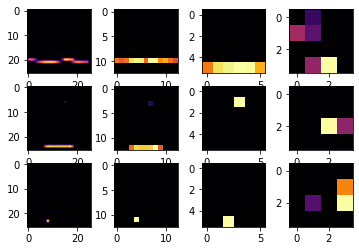

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras import models

f, axarr = plt.subplots(3,4)

FIRST_IMAGE=0
SECOND_IMAGE=1
THIRD_IMAGE=2
CONVOLUTION_NUMBER = 1

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)